# Post-processing Data Transformations and Exploratory Data Analysis

The present notebook is part of a series of notebooks related to the MSc. thesis: **Sentiment analysis on generative language models based on Social Media commentary of industry participants**

The MSc. thesis research was conducted based on tweets about ChatGPT. These were collected, processed and analyzed with the scope of answering the following research question:

**How are generative language models perceived by participants of different industries based on social media commentary?**

For answering the research question, a focal point consists in analyzing the twitter data already processed by the means of LDA for topic modeling and VADER for sentiment analysis. 

To explore the data from an analytical perspective throughout this notebook, the data will be transformed so that it will be most fit for the analysis conducted in PowerBI. Additionally, certain complementary visualizations and calculation will also be conducted in this notebook.

In [1]:
#Import all necesary packages
import pandas as pd 
from pandas import option_context
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import ast # to cast data as specific data types
import math

import datetime as dt

#Import packages for simple visuals
import matplotlib.dates as mdates
import plotly.express as px

#Import packages for interactive visuals
import plotly.graph_objs as go
from plotly.subplots import make_subplots

#Set pandas options for ease of cleaning
pd.set_option('display.max_rows', 500)
pd.options.mode.chained_assignment = None

# DataSets

This section of the notebook selects the relevant fields for tweets and users, from all csv files generated throughout the methods used in this project.

In [21]:
#Load all scraped columns
tweets_all_information= pd.read_csv("data_files/raw_data_30Nov_07Apr_CLEAN.csv")
tweets_all_information['tweet_id'] = tweets_all_information['tweet_id'].astype(str)
tweets_all_information['tweet_inreplytotweetid'] = tweets_all_information['tweet_inreplytotweetid'].apply(lambda x: str('%.0f' % x))
tweets_all_information['usr_inreply_id'] = tweets_all_information['usr_inreply_id'].apply(lambda x: str(int(x)) if math.isnan(x) != True else x)
for column in ['tweet_id','tweet_inreplytotweetid','usr_userid','usr_inreply_id']:
    tweets_all_information[column]=tweets_all_information[column].astype(str)    
tweets_all_information.shape

(1640146, 17)

In [22]:
#Inspect all columns
tweets_all_information.head(3)

,index,tweet_id,tweet_date,tweet_content,tweet_source,tweet_replycount,tweet_retweetcount,tweet_likecount,tweet_inreplytotweetid,tweet_hashtags,usr_description,usr_verified,usr_follower_count,usr_location,usr_userid,usr_created,usr_inreply_id
0,0,1644449184060252160,2023-04-07 21:16:52+00:00,I am thinking of writing a plugin for ChatGPT ...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0,0,0,nan,['ChatGPTto'],I say things. Things so important that they ma...,False,70,A small outpost on Pluto,17632837,2008-11-25 21:50:18+00:00,nan
1,2,1644449166775529474,2023-04-07 21:16:48+00:00,COVID : TREATMENT IDEAS\n\n#CHATGPT,"<a href=""http://twitter.com/download/android"" ...",0,0,0,nan,['CHATGPT'],"Oxford DPhil in Zoology, Environmental Rating ...",False,24743,Little England,21855179,2009-02-25 11:07:48+00:00,nan
2,3,1644449134425022470,2023-04-07 21:16:40+00:00,any cool viruses to give the chat gpt AI?,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0,0,0,nan,NaN,enjoyer of long walks in the dungeon.,False,228,home.,1207075000164864000,2019-12-17 23:08:33+00:00,nan


In [3]:
#Load tweet data related to sentiment anlaysis
tweets_sentiment= pd.read_csv("data_files/Tweets_SentimentLabelled_PreLDA.csv")
tweets_sentiment['tweet_id'] = tweets_sentiment['tweet_id'].astype(str)
for column in ['tweet_content_hashtags', 'tweet_content_mentions', 'tweet_content_URLs', 'tweet_content_emoji','tweet_content_tokens','vader_polarity']:
    tweets_sentiment[column] = tweets_sentiment[column].apply(lambda x: ast.literal_eval(x) if str(x)[0]=="[" or str(x)[0]=="{" else [])
tweets_sentiment.shape

(1640046, 13)

In [45]:
#Inspect data
tweets_sentiment.head(3)


,tweet_id,tweet_content,tweet_content_hashtags,tweet_content_mentions,tweet_content_URLs,tweet_content_emoji,tweet_content_clean,tweet_content_tokens,tweet_content_tokens_no_verbs,tweet_content_sentiment_prepro,vader_polarity,sentiment,compound
0,1644446066748854281,"What's happening, it asks, and I reply that ch...",[teaching],[],[],NaN,whats happening it asks and i reply that chat ...,"['class', 'kind', 'world', 'english', 'alterna...","[class, kind, world, english, alternative, com...","What's happening, it asks, and I reply that ch...","{'neg': 0.0, 'neu': 0.88, 'pos': 0.12, 'compou...",Positive,0.6486
1,1644442136664764444,"...one in the depot is approximately 17,42 MB ...",[],[],[],NaN,one in the depot is approximately mb in size t...,"['correct', 'size', 'chatgpt', 'depot', 'curre...","[correct, size, chatgpt, depot, current, ameri...","...one in the depot is approximately , MB in s...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,0.0000
2,1644437753721942044,I’ve converted to chatgpt,[],[],[],NaN,ive converted to chatgpt,['chatgpt'],[chatgpt],I’ve converted to chatgpt,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,0.0000


In [4]:
#Tweet data related to topic modeling
tweets_topic= pd.read_csv("data_files/Tweets_TopicLabelled.csv")
tweets_topic['tweet_id'] = tweets_topic['tweet_id'].astype(str)
for column in ['tweet_content_hashtags', 'tweet_content_tokens']:
    tweets_topic[column] = tweets_topic[column].apply(lambda x: ast.literal_eval(x) if str(x)[0]=="[" or str(x)[0]=="{" else [])
tweets_topic.shape

(1640046, 6)

In [14]:
#Inspect data 
tweets_topic.head()

,tweet_id,tweet_content_hashtags,tweet_content_clean,tweet_content_tokens_no_verbs,tweet_content_tokens,tweet_topic
0,1644446066748854281,[teaching],whats happening it asks and i reply that chat ...,"['class', 'kind', 'world', 'english', 'alterna...","[work, comp, video, alternative, together, wor...",Human-Bot Interaction
1,1644442136664764444,[],one in the depot is approximately mb in size t...,"['correct', 'size', 'chatgpt', 'depot', 'curre...","[mb, current, american, conversion, approximat...",Problem Solving
2,1644437753721942044,[],ive converted to chatgpt,['chatgpt'],[],Education
3,1644433541827280896,[chatgpt],asked if someone has a bmi of are they obese ...,"['fat', 'replace', 'person', 'obese', 'reply',...","[doc, replace, show, health, fat, risk, person...",Human-Bot Interaction
4,1644429028307406849,"[ChatGPT, AI, Hardware, blog]",how does chatgpt train its ai using advanced h...,"['train', 'blog', 'chatgpt', 'advanced', 'post...","[advanced, hardware, blog, new, explore, train...",Content Generation


In [5]:
#Tweet data related to sentiment anlaysis
user_data= pd.read_csv("data_files/usr_TopicLabelledFINAL.csv")
user_data['usr_userid'] = user_data['usr_userid'].astype(str)
user_data['usr_description_hashtags'] = user_data['usr_description_hashtags'].apply(lambda x: ast.literal_eval(x) if str(x)[0]=="[" or str(x)[0]=="{" else [])
user_data.shape

C:\Users\oanaa\AppData\Local\Temp\ipykernel_7112\292428466.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  user_data= pd.read_csv("usr_TopicLabelledFINAL.csv")


(698722, 10)

In [24]:
#Inspect data
user_data.head(3)

,usr_userid,usr_description_origin,usr_description_prepro,usr_description_hashtags,usr_description_mentions,usr_description_URLs,usr_description_emoji,usr_description_clean,usr_description_tokens,urs_industry_categ
0,354863991,using A.I. to propel the real estate industry ...,using A.I. to propel the real estate industry ...,"[PropTech, AI]",[],[],NaN,using ai to propel the real estate industry fo...,"['cle', 'sport', 'enjoy', 'forward', 'industry...",Arts & Entertainment
1,4398626122,OpenAI’s mission is to ensure that artificial ...,OpenAI’s mission is to ensure that artificial ...,[],[],['openai.com/jobs'],NaN,openais mission is to ensure that artificial g...,"['mission', 'hire', 'intelligence', 'artificia...",NotIndustry(1)
2,162124540,President & Co-Founder @OpenAI,President & Co-Founder @OpenAI,[],['OpenAI'],[],NaN,president co-founder,"['co', 'president', 'founder']",Entreprenourship & Business Commentary


In [16]:
#Tweet data selection
tweets_data_condensed = tweets_all_information[['tweet_id','tweet_date','tweet_content','tweet_replycount','tweet_retweetcount', 
                                               'tweet_likecount','tweet_inreplytotweetid','tweet_hashtags','usr_userid','usr_inreply_id']]
tweets_sentiment_condensed = tweets_sentiment[['tweet_id','tweet_content_sentiment_prepro','vader_polarity','sentiment','compound']]
tweet_topics_condensed = tweets_topic[['tweet_id','tweet_content_clean','tweet_content_tokens','tweet_topic']]

#Dataframe of all needed cols related to tweets
tweets_information = tweets_sentiment_condensed.merge(tweet_topics_condensed,on='tweet_id',how='left').merge(tweets_data_condensed,on='tweet_id',how='left').set_index('tweet_id',inplace=True)

In [19]:
#tweets_information.to_csv("tweets_data_condensed_FINAL.csv")

In [37]:
#Users data selection
user_information= tweets_all_information[['usr_userid','usr_location']].drop_duplicates(subset='usr_userid', keep='last')
user_data_short = user_data[['usr_userid', 'usr_description_origin','usr_description_hashtags', 'usr_description_mentions',
                                    'usr_description_URLs', 'usr_description_emoji','usr_description_clean', 'usr_description_tokens','urs_industry_categ']]

#Dataframe of all needed cols related to users
user_information = user_data_short.merge(user_information,on='usr_userid',how='left').set_index('usr_userid')

In [42]:
#Save condesed data
#user_information.to_csv("users_data_condensed_FINAL.csv")

# Condesned data

This notebook section serves as basis for any other analysis as it loads the selected data for tweets and users.

In [2]:
#Load Condensed Data
tweets_information = pd.read_csv("data_files/13_tweets_data_condensed_FINAL.csv", parse_dates=['tweet_date'])

tweets_information['tweet_id'] = tweets_information['tweet_id'].astype(str)
tweets_information['usr_userid'] = tweets_information['usr_userid'].astype(str)
tweets_information['tweet_inreplytotweetid'] = tweets_information['tweet_inreplytotweetid'].apply(lambda x: str('%.0f' % x))
tweets_information['usr_inreply_id'] = tweets_information['usr_inreply_id'].apply(lambda x: str('%.0f' % x))
tweets_information['date'] = tweets_information['tweet_date'].dt.date

for column in ['tweet_hashtags','tweet_content_tokens','vader_polarity']:
    tweets_information[column] = tweets_information[column].apply(lambda x: ast.literal_eval(x) if str(x)[0]=="[" or str(x)[0]=="{" else [])

tweets_information.head(3)

,tweet_id,tweet_content_sentiment_prepro,vader_polarity,sentiment,compound,tweet_content_clean,tweet_content_tokens,tweet_topic,tweet_date,tweet_content,tweet_replycount,tweet_retweetcount,tweet_likecount,tweet_inreplytotweetid,tweet_hashtags,usr_userid,usr_inreply_id,tweet_relevant,new_user,date
0,1598014056790622225,ChatGPT: Optimizing Language Models for Dialogue,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...",Positive,0.4588,chatgpt optimizing language models for dialogue,"[optimize, dialogue, language, model]",UnclearTopic,2022-11-30 18:00:15+00:00,ChatGPT: Optimizing Language Models for Dialog...,0,0,2,nan,[],354863991,nan,True,True,2022-11-30
1,1598014522098208769,"Try talking with ChatGPT, our new AI system wh...","{'neg': 0.0, 'neu': 0.664, 'pos': 0.336, 'comp...",Positive,0.8225,try talking with chatgpt our new ai system whi...,"[feedback, talk, improve, optimize, system, di...",UnclearTopic,2022-11-30 18:02:06+00:00,"Try talking with ChatGPT, our new AI system wh...",1320,3518,13703,nan,[],4398626122,nan,True,True,2022-11-30
2,1598015627540635648,"Just launched ChatGPT, our new AI system which...","{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...",Positive,0.5423,just launched chatgpt our new ai system which ...,"[optimize, system, dialogue, new, launch]",UnclearTopic,2022-11-30 18:06:29+00:00,"Just launched ChatGPT, our new AI system which...",84,369,2370,nan,[],162124540,nan,True,True,2022-11-30


In [12]:
#tweets_information.to_csv("tweets_data_condensed_FINAL.csv",index=False)

In [3]:
#Load User data
user_information= pd.read_csv("data_files/14_users_data_condensed_FINAL.csv")
user_information['usr_userid'] = user_information['usr_userid'].astype(str)
user_information.rename(columns={'date':'join_date'},inplace=True)

for column in ['usr_description_hashtags','usr_description_mentions','usr_description_URLs','usr_description_tokens']:
    user_information[column] = user_information[column].apply(lambda x: ast.literal_eval(x) if str(x)[0]=="[" or str(x)[0]=="{" else [])

user_information.head(3)

,usr_userid,usr_description_origin,usr_description_hashtags,usr_description_mentions,usr_description_URLs,usr_description_emoji,usr_description_clean,usr_description_tokens,urs_industry_categ,usr_location,first_tweet_date,sentiment,avg_compund
0,354863991,using A.I. to propel the real estate industry ...,"[PropTech, AI]",[],[],NaN,using ai to propel the real estate industry fo...,"[cle, sport, enjoy, forward, industry, read, p...",Arts & Entertainment,"Cleveland, OH",2022-11-30,Positive,0.279280
1,4398626122,OpenAI’s mission is to ensure that artificial ...,[],[],[openai.com/jobs],NaN,openais mission is to ensure that artificial g...,"[mission, hire, intelligence, artificial, huma...",NotIndustry(1),NaN,2022-11-30,Positive,0.387829
2,162124540,President & Co-Founder @OpenAI,[],[OpenAI],[],NaN,president co-founder,"[co, president, founder]",Entrepreneurship & Business Leadership,NaN,2022-11-30,Positive,0.438995


In [58]:
user_information.urs_industry_categ.unique()

array(['Arts & Entertainment', 'NotIndustry(1)',
       'Entreprenourship & Business Commentary', 'Software Engingeering',
       'NotIndustry(2)', 'Marketing and Business Development',
       'Education & Academia', 'Finance & Crypto', 'NotSpecified'],
      dtype=object)

In [63]:
#user_information.replace({'urs_industry_categ' : { 'Entreprenourship & Business Commentary' : 'Entrepreneurship & Business Leadership', 'Marketing and Business Development' : 'Marketing & Business Development', 'Software Engingeering' : 'Software Engineering' }},inplace=True)
#user_information.to_csv("users_data_condensed_FINAL.csv",index=False)

# Tweets: Outlier Cleaning

When inspecting and analyzing visually the final dataset as it resulted from the topic modelling and sentiment analysis techniques, certain tweets appeared to be redundant. Such exceptions are handled in this section.

In [15]:
#TODO: when amendments to condesned dataset are made run the below
#tweets_information.to_csv("tweets_data_condensed_FINAL.csv",index=False)

In [7]:
#Inspect tweets data
tweets_information.head(3)

,tweet_id,tweet_content_sentiment_prepro,vader_polarity,sentiment,compound,tweet_content_clean,tweet_content_tokens,tweet_topic,tweet_date,tweet_content,tweet_replycount,tweet_retweetcount,tweet_likecount,tweet_inreplytotweetid,tweet_hashtags,usr_userid,usr_inreply_id,tweet_relevant,new_user,date
0,1598014056790622225,ChatGPT: Optimizing Language Models for Dialogue,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...",Positive,0.4588,chatgpt optimizing language models for dialogue,"[optimize, dialogue, language, model]",UnclearTopic,2022-11-30 18:00:15+00:00,ChatGPT: Optimizing Language Models for Dialog...,0,0,2,nan,[],354863991,nan,True,True,2022-11-30
1,1598014522098208769,"Try talking with ChatGPT, our new AI system wh...","{'neg': 0.0, 'neu': 0.664, 'pos': 0.336, 'comp...",Positive,0.8225,try talking with chatgpt our new ai system whi...,"[feedback, talk, improve, optimize, system, di...",UnclearTopic,2022-11-30 18:02:06+00:00,"Try talking with ChatGPT, our new AI system wh...",1320,3518,13703,nan,[],4398626122,nan,True,True,2022-11-30
2,1598015627540635648,"Just launched ChatGPT, our new AI system which...","{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...",Positive,0.5423,just launched chatgpt our new ai system which ...,"[optimize, system, dialogue, new, launch]",UnclearTopic,2022-11-30 18:06:29+00:00,"Just launched ChatGPT, our new AI system which...",84,369,2370,nan,[],162124540,nan,True,True,2022-11-30


Tweets following the below pattern were observed. These need to be categorized as irrelevant since they are not adding an opinion about ChatGPT or GLLMs, but are marely part of a marketing campaign.  

Tweet pattern:

* 💬 ChatGPT is FREE \n
🔍 Google is FREE \n
📹 YouTube is FREE \n
📋 Blogs are FREE \n
🎓 Courses are FREE \n
🐙 GitHub is FREE \n
🎨 Canva is FREE \n
🎧 Podcasts are FREE \n
🗒️ Notion is FREE \n
🔌 Public APIs are FREE \n
🐦 Twitter is FREE 

Additionally tweets that had a too lenghty content appears as below. These will also be considered irrelevant. 

"Response exceeds tweet character limit"

In [8]:
#Inspect patterns in tweets that may be irrelevant
duplicated_rows=tweets_information[tweets_information.duplicated(subset='tweet_content')].sort_values('tweet_content')
count_duplicated_rows = duplicated_rows.groupby(['tweet_content','usr_userid']).size().reset_index(name='counts').sort_values(by= 'counts',ascending=False)
with option_context('display.max_colwidth', 400):
    display(count_duplicated_rows[['tweet_content','usr_userid','counts']].head(10))

,tweet_content,usr_userid,counts
16640,@gpt_chatgpt Response exceeds tweet character limit,1503707096465883136,9613
15887,@gpt_chatgpt \n\nI apologize for exceeding the tweet character limit. I will try to keep my responses shorter in the future.,1503707096465883136,87
15884,@gpt_chatgpt \n\nI apologize for exceeding the tweet character limit. I will try to be more concise in the future.,1503707096465883136,59
38645,MIRACLE BY ECE: Microsoft extends AI partnership with ChatGPT and ... https://t.co/yqJL6fluPQ,3258908587,54
15949,@gpt_chatgpt \n\nI apologize for the inconvenience. Is there anything else I can help you with?,1503707096465883136,53
16316,"@gpt_chatgpt \n\nI'm sorry, I understand that my response exceeded the tweet character limit. I'll try to keep my responses shorter in the future.",1503707096465883136,52
16285,"@gpt_chatgpt \n\nI'm sorry, I understand that my response exceeded the character limit for a tweet. I'll try to keep my responses shorter in the future.",1503707096465883136,50
38640,"MIRACLE BY ECE: ChatGPT to Become Fastest-Growing App, Estimated t... https://t.co/X16mbSLPKj",3258908587,50
38646,MIRACLE BY ECE: Microsoft introduces new Bing with ChatGPT powers https://t.co/9cTRWGYaIa,3258908587,48
16049,@gpt_chatgpt \n\nI apologize for the response exceeding the tweet character limit. Is there anything else I can help you with?,1503707096465883136,48


In [ ]:
#Create new column that stores whether a tweet is relevant or not 
tweets_information['tweet_relevant'] = True
#lowercase tweet text
empty_tweet ="Response exceeds tweet character limit".lower()
#assign False value to tweet_relevant column where the tweets are equal to empty_tweet
tweets_information.loc[(tweets_information['tweet_content_sentiment_prepro'].str.lower() == empty_tweet) & (tweets_information['tweet_relevant'] == True), 'tweet_relevant'] = False

In [25]:
#Create lambda function to check if by splitting the tweet everytime "is FREE appears", more than 3 elements are resulted
lambda_marketing_add = lambda x: False if (x['tweet_relevant'] and len(x['tweet_content_sentiment_prepro'].split("is FREE")) > 3) else x['tweet_relevant']

# apply the lambda function to tweets_information and assign  result to tweet_relevant
tweets_information['tweet_relevant'] = tweets_information.apply(lambda_marketing_add, axis=1)

In [9]:
#Inspect rows or irrelevant tweets
tweets_information[tweets_information['tweet_relevant']== False]

,tweet_id,tweet_content_sentiment_prepro,vader_polarity,sentiment,compound,tweet_content_clean,tweet_content_tokens,tweet_topic,tweet_date,tweet_content,tweet_replycount,tweet_retweetcount,tweet_likecount,tweet_inreplytotweetid,tweet_hashtags,usr_userid,usr_inreply_id,tweet_relevant,new_user,date
239948,1609787503107801088,ChatGPT is FREE. Google is FREE. YouTube is FR...,"{'neg': 0.046, 'neu': 0.494, 'pos': 0.46, 'com...",Positive,0.9166,chatgpt is freegoogle is freeyoutube is freeth...,"[freethere, freegoogle, freeyoutube, make, exc...",UnclearTopic,2023-01-02 05:43:43+00:00,ChatGPT is FREE.\nGoogle is FREE.\nYouTube is ...,0,0,0,nan,[],916577492634279941,nan,False,False,2023-01-02
255565,1610628093852684290,Response exceeds tweet character limit,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,0.0000,response exceeds tweet character limit,"[response, limit, tweet, character]",UnclearTopic,2023-01-04 13:23:56+00:00,@45lodathrows Response exceeds tweet character...,1,0,0,1610628036025798912,[],1503707096465883136,nan,False,False,2023-01-04
256529,1610652644531654663,Response exceeds tweet character limit,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,0.0000,response exceeds tweet character limit,"[response, limit, tweet, character]",UnclearTopic,2023-01-04 15:01:29+00:00,@45lodathrows Response exceeds tweet character...,1,0,0,1610648580917809152,[],1503707096465883136,nan,False,False,2023-01-04
257092,1610666549572173830,Response exceeds tweet character limit,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,0.0000,response exceeds tweet character limit,"[response, limit, tweet, character]",UnclearTopic,2023-01-04 15:56:44+00:00,@45lodathrows Response exceeds tweet character...,1,0,0,1610666477321097216,[],1503707096465883136,nan,False,False,2023-01-04
257106,1610666753016885248,Response exceeds tweet character limit,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,0.0000,response exceeds tweet character limit,"[response, limit, tweet, character]",UnclearTopic,2023-01-04 15:57:33+00:00,@45lodathrows Response exceeds tweet character...,1,0,0,1610666723849695232,[],1503707096465883136,nan,False,False,2023-01-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535545,1642124723382542337,🆓 ChatGPT is FREE 🐦 Twitter is FREE 🔍 Google i...,"{'neg': 0.02, 'neu': 0.474, 'pos': 0.506, 'com...",Positive,0.9952,chatgpt is free twitter is free google is free...,"[google, free, podcast, chance, clickup, canva...",Problem Solving,2023-04-01 11:20:17+00:00,🆓 ChatGPT is FREE\n🐦 Twitter is FREE\n🔍 Google...,0,0,5,nan,[],2604962138,nan,False,False,2023-04-01
1596292,1643528240244445184,💬 ChatGPT is FREE 🔍 Google is FREE 📹 YouTube i...,"{'neg': 0.0, 'neu': 0.54, 'pos': 0.46, 'compou...",Positive,0.9933,chatgpt is free google is free youtube is free...,"[google, free, podcast, building, freestart, c...",Content Generation,2023-04-05 08:17:22+00:00,💬 ChatGPT is FREE\n🔍 Google is FREE\n📹 YouTube...,16,235,919,nan,[],1471429673905278976,nan,False,False,2023-04-05
1604499,1643675023033475072,💬 ChatGPT is FREE 🔍 Google is FREE 📹 YouTube i...,"{'neg': 0.0, 'neu': 0.54, 'pos': 0.46, 'compou...",Positive,0.9933,chatgpt is free google is free youtube is free...,"[google, free, podcast, building, freestart, c...",Content Generation,2023-04-05 18:00:38+00:00,💬 ChatGPT is FREE\n🔍 Google is FREE\n📹 YouTube...,0,3,4,nan,[],1621789464505847808,nan,False,False,2023-04-05
1605423,1643689970253836289,🆓 ChatGPT is FREE 🐦 Twitter is FREE 🔍 Google i...,"{'neg': 0.0, 'neu': 0.467, 'pos': 0.533, 'comp...",Positive,0.9955,chatgpt is free twitter is free google is free...,"[google, linearapp, free, freeeverybody, podca...",Content Generation,2023-04-05 19:00:01+00:00,🆓 ChatGPT is FREE\n🐦 Twitter is FREE\n🔍 Google...,5,3,38,nan,[],62378351,nan,False,False,2023-04-05


# Tweets: Users joining as result of a reply

This section tries to highlight how many users joiend conversations about ChatGPT as to reply to antoher user

In [ ]:
tweets_information.head(3)

In [122]:
#Create new column to check wheter specific rows are when new users join
tweets_information['new_user'] = False
tweets_information = tweets_information.sort_values(by=['usr_userid','tweet_date'])

In [123]:
#Sort tweets_information table by date
tweets_information = tweets_information.sort_values(by=['tweet_date']).reset_index(drop=True)

In [10]:
# create an empty dictionary to store whether a user has appeared before
appeared_before = {}

# loop through each tweet
for index, row in tweets_information.iterrows():
    # store user id
    user_id = row['usr_userid']
    # check if the user has is already in appeared_before dict
    if user_id in appeared_before:
        # if the user exists in dict, set col val to False
        tweets_information.at[index, 'new_user'] = False
    else:
        # if the user is new set col val to True
        tweets_information.at[index, 'new_user'] = True
        #add val to dict
        appeared_before[user_id] = True

In [12]:
# check if each user has been considered new once
tweet_new_users =tweets_information[tweets_information['new_user']==True]
tweet_new_users.shape

(698701, 20)

In [13]:
#See users that have attracted most user to discussion
new_users_added_by_user = tweet_new_users.groupby(['usr_inreply_id']).size().reset_index(name='counts_new_users')
new_users_added_by_user = new_users_added_by_user[new_users_added_by_user['usr_inreply_id']!='nan']
new_users_added_by_user.sort_values(by='counts_new_users',ascending=False).head(15)

,usr_inreply_id,counts_new_users
64822,44196397,9201
18276,1364725713329356800,5136
40645,1628854824803475712,2639
30582,1506055005992026112,2404
38912,1605,1657
8514,1200616796295847936,1435
66442,481229497,1420
81929,95092020,1009
36730,1582819328281481216,1007
64244,427089628,861


In [39]:
#Total users joining as result of reply
new_users_added_by_user.shape

(84134, 2)

In [ ]:
#% of total
perc_of_total = 

In [50]:
tweet_new_users.head(3)

,tweet_id,tweet_content_sentiment_prepro,vader_polarity,sentiment,compound,tweet_content_clean,tweet_content_tokens,tweet_topic,tweet_date,tweet_content,tweet_replycount,tweet_retweetcount,tweet_likecount,tweet_inreplytotweetid,tweet_hashtags,usr_userid,usr_inreply_id,tweet_relevant,new_user,date
0,1598014056790622225,ChatGPT: Optimizing Language Models for Dialogue,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...",Positive,0.4588,chatgpt optimizing language models for dialogue,"[optimize, dialogue, language, model]",UnclearTopic,2022-11-30 18:00:15+00:00,ChatGPT: Optimizing Language Models for Dialog...,0,0,2,nan,[],354863991,nan,True,True,2022-11-30
1,1598014522098208769,"Try talking with ChatGPT, our new AI system wh...","{'neg': 0.0, 'neu': 0.664, 'pos': 0.336, 'comp...",Positive,0.8225,try talking with chatgpt our new ai system whi...,"[feedback, talk, improve, optimize, system, di...",UnclearTopic,2022-11-30 18:02:06+00:00,"Try talking with ChatGPT, our new AI system wh...",1320,3518,13703,nan,[],4398626122,nan,True,True,2022-11-30
2,1598015627540635648,"Just launched ChatGPT, our new AI system which...","{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...",Positive,0.5423,just launched chatgpt our new ai system which ...,"[optimize, system, dialogue, new, launch]",UnclearTopic,2022-11-30 18:06:29+00:00,"Just launched ChatGPT, our new AI system which...",84,369,2370,nan,[],162124540,nan,True,True,2022-11-30


# Tweets: Sentiment trend on Tweets

This section showcases the sentiment trend by industry  based on tweets. 

In [4]:
#Inspect dataframe
tweets_information.head(3)

,tweet_id,tweet_content_sentiment_prepro,vader_polarity,sentiment,compound,tweet_content_clean,tweet_content_tokens,tweet_topic,tweet_date,tweet_content,tweet_replycount,tweet_retweetcount,tweet_likecount,tweet_inreplytotweetid,tweet_hashtags,usr_userid,usr_inreply_id,tweet_relevant,new_user,date
0,1598014056790622225,ChatGPT: Optimizing Language Models for Dialogue,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...",Positive,0.4588,chatgpt optimizing language models for dialogue,"[optimize, dialogue, language, model]",UnclearTopic,2022-11-30 18:00:15+00:00,ChatGPT: Optimizing Language Models for Dialog...,0,0,2,nan,[],354863991,nan,True,True,2022-11-30
1,1598014522098208769,"Try talking with ChatGPT, our new AI system wh...","{'neg': 0.0, 'neu': 0.664, 'pos': 0.336, 'comp...",Positive,0.8225,try talking with chatgpt our new ai system whi...,"[feedback, talk, improve, optimize, system, di...",UnclearTopic,2022-11-30 18:02:06+00:00,"Try talking with ChatGPT, our new AI system wh...",1320,3518,13703,nan,[],4398626122,nan,True,True,2022-11-30
2,1598015627540635648,"Just launched ChatGPT, our new AI system which...","{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...",Positive,0.5423,just launched chatgpt our new ai system which ...,"[optimize, system, dialogue, new, launch]",UnclearTopic,2022-11-30 18:06:29+00:00,"Just launched ChatGPT, our new AI system which...",84,369,2370,nan,[],162124540,nan,True,True,2022-11-30


In [5]:
user_information['urs_industry_categ'].unique()

array(['Arts & Entertainment', 'NotIndustry(1)',
       'Entrepreneurship & Business Leadership', 'Software Engineering',
       'NotIndustry(2)', 'Marketing & Business Development',
       'Education & Academia', 'Finance & Crypto', 'NotSpecified'],
      dtype=object)

In [53]:
#Create dataframe to be used in trendline
#merge user information
df_trendline = tweets_information[tweets_information['tweet_relevant']==True].merge(user_information,on='usr_userid',how='left')
#select relevant categories only
df_trendline = df_trendline[~df_trendline['urs_industry_categ'].isin(['NotIndustry(1)','NotIndustry(2)','NotSpecified'])]
#cast date to datetime in new col
df_trendline['date'] = pd.to_datetime(df_trendline['tweet_date']).dt.date
#keep only relevant information in dataframe
df_trendline =df_trendline[['date','tweet_id','tweet_date','tweet_content_clean','compound','urs_industry_categ']].sort_values(by='tweet_date')

In [54]:
#Group data in trendline df by date, and user, and calculate the mean of these values
grouped_trendline= df_trendline.groupby(['date','urs_industry_categ'])['compound'].mean().to_frame().reset_index()

In [9]:
ind= grouped_trendline[grouped_trendline['urs_industry_categ']=='Education & Academia']

In [140]:
grouped_trendline.urs_industry_categ.unique()

array(['Arts & Entertainment', 'Education & Academia',
       'Entrepreneurship & Business Leadership', 'Finance & Crypto',
       'Marketing & Business Development', 'Software Engineering'],
      dtype=object)

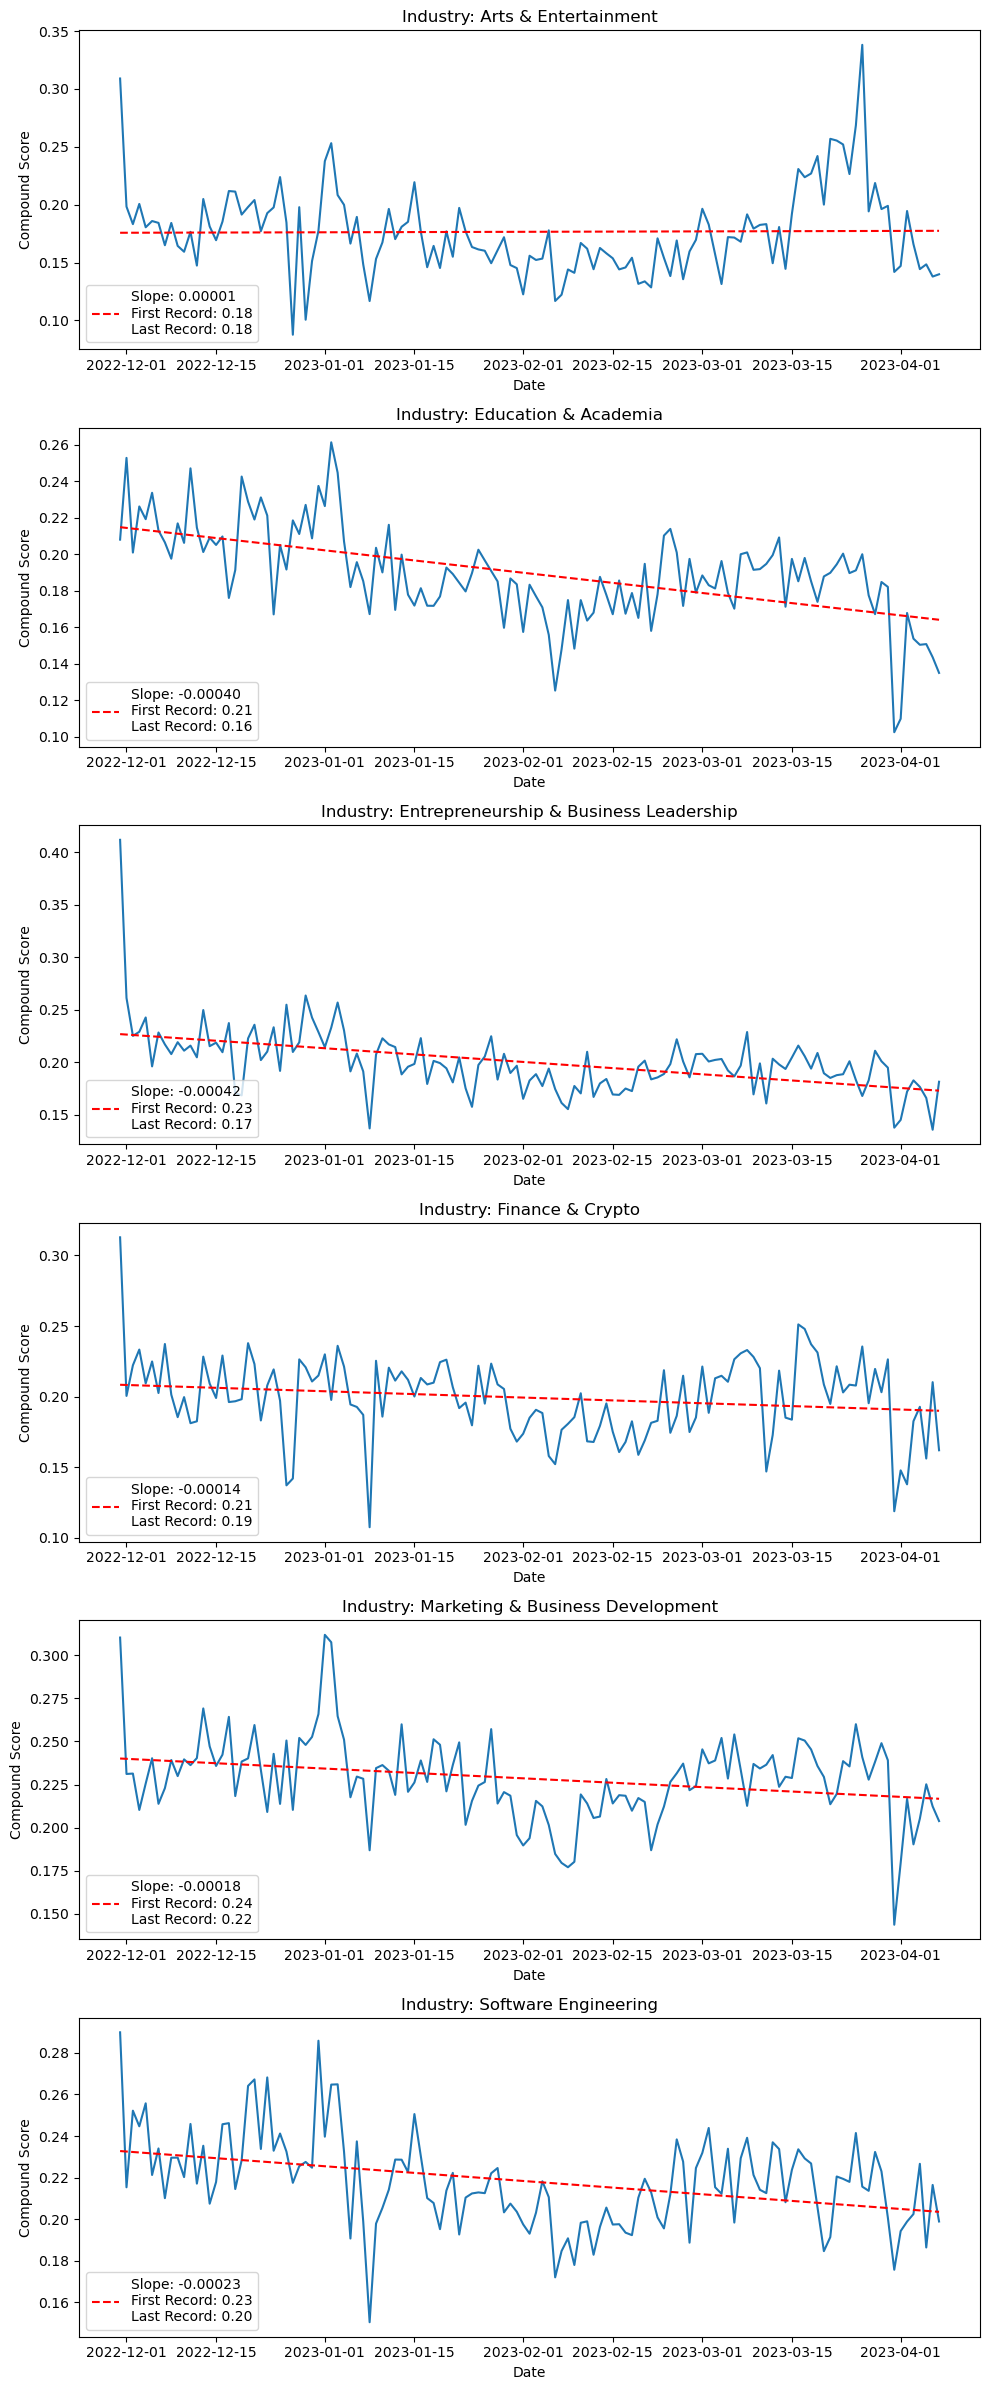

In [10]:
#The code blow was inspired by information found at: https://linuxhint.com/matplotlib-trendline/
#The code below was inspired by information found at: https://dzone.com/articles/python-how-to-add-trend-line-to-line-chartgraph
# Group data by industry 
groups = grouped_trendline.groupby('urs_industry_categ')

# Create subplots for each industry 
fig, axes = plt.subplots(nrows=len(groups), ncols=1, figsize=(10, 4*len(groups)))

# Add elements to each subplot
for i, (category, group) in enumerate(groups):
    # x axis values, Cast date to matplotlib
    x = mdates.date2num(group['date'])
    # y axis values
    y = group['compound']
    # get slope of line with x as dates and y as compound
    z = np.polyfit(x, y, 1)
    #get line with slope z
    p = np.poly1d(z)

    #create subplot for industry 
    ax = axes[i]
    
    #Get vals of first and last points
    first_point = f'First Record: {p(x[0]):.2f}'
    last_point = f'Last Record: {p(x[-1]):.2f}'

    # Plot the streight line
    ax.plot(group['date'], y)
    #add fist and last point to line
    ax.plot(group['date'], p(x), "r--",label=f'Slope: {z[0]:.5f}\n{first_point}\n{last_point}')

    #Add legend to the plot
    ax.legend(loc='lower left')
    
    #Name axes
    ax.set_xlabel('Date')
    ax.set_ylabel('Compound Score')
    #add title 
    ax.set_title('Industry: {}'.format(category))

    #Englarge width of plot so x axis is readable
    ax.autoscale(enable=True, axis='y', tight=False)

#Adjust space between subplots
plt.tight_layout()
plt.show()

# Visual of new users joining conversation

This section shows the trend in new users joining or returning users to the conversations around ChatGPT

In [69]:
#create new datafame to use in this section 
#filter tweets to solely relevant ones
tweets_info= tweets_information[tweets_information['tweet_relevant']==True].copy()
#filter only first tweets of userid
tweets_info = tweets_info[['date','usr_userid','usr_inreply_id','tweet_id']].drop_duplicates(subset=['date','usr_userid'],keep='first')

In [70]:
#Create copy of user_info dataframe
user_info = user_information.copy()

In [71]:
#Transform date to datetime format
user_information['first_tweet_date'] = pd.to_datetime(user_info['first_tweet_date'])
tweets_info['date'] = pd.to_datetime(tweets_info['date'])

In [72]:
#Group by date
grouped_df = tweets_info.groupby(['usr_userid','date','usr_inreply_id','tweet_id']).size().reset_index(name='counts')
#Sanity check. no rows should exist with counts more than 1
grouped_df[grouped_df['counts']!=1]

,usr_userid,date,usr_inreply_id,tweet_id,counts


In [75]:
#Add user information to grouped dataframe
grouped_df = grouped_df.merge(user_info[['usr_userid','first_tweet_date','urs_industry_categ']],on='usr_userid',how='left')
grouped_df['new_user'] = (grouped_df['date'] == grouped_df['first_tweet_date'])

In [78]:
grouped_df['urs_industry_categ'].unique()

array(['NotSpecified', 'Arts & Entertainment', 'Finance & Crypto',
       'Entrepreneurship & Business Leadership',
       'Marketing & Business Development', 'Software Engineering',
       'NotIndustry(2)', 'Education & Academia', 'NotIndustry(1)'],
      dtype=object)

In [79]:
#filter to exclude categories which are not industries
grouped_df=grouped_df[~grouped_df['urs_industry_categ'].isin(['NotSpecified','NotIndustry(2)','NotIndustry(1)'])]

In [81]:
#Create col to store whether tweet is in reply or not 
grouped_df['inreply_type']=(grouped_df['usr_inreply_id']!='nan')

In [82]:
grouped_df.usr_userid.nunique()

415996

In [83]:
grouped_df.reset_index(drop=True).head()

,usr_userid,date,usr_inreply_id,tweet_id,counts,first_tweet_date,urs_industry_categ,new_user,inreply_type
0,1000002795213385734,2023-01-13,615328000,1613784435819962368,1,2023-01-13,Arts & Entertainment,True,True
1,1000004500525060097,2023-02-28,nan,1630543162342031363,1,2023-02-28,Finance & Crypto,True,False
2,1000004500525060097,2023-03-01,nan,1630888202184663043,1,2023-02-28,Finance & Crypto,False,False
3,1000004500525060097,2023-03-18,nan,1636993018006732804,1,2023-02-28,Finance & Crypto,False,False
4,1000006344089497600,2023-04-06,nan,1644066067420008471,1,2023-04-06,Arts & Entertainment,True,False


In [84]:
#Save amendments to file
#grouped_df.to_csv("users_by_date_condensed_FINAL.csv",index=False)

In [87]:
#Dataframe with values in new_user column replaced by describing strings
df_vis = grouped_df.set_index('date').replace({'new_user': {False: 'Returning User',True: 'New User'}})

# Resample df by day and user type, counting unique no of users
df_resampled = df_vis.groupby([pd.Grouper(freq='D'), 'new_user'])['usr_userid'].nunique().reset_index()

# Create barbplot with x on date, count of usr id on y and colors set based on new_user 
fig = px.bar(df_resampled, x='date', y='usr_userid', color='new_user', barmode='stack', hover_name='usr_userid', template='plotly')

fig.update_traces(mode='lines', line=dict(color='black', width=2), selector=dict(type='scatter'))

#Set title for plot, and axes 
fig.update_layout(title='New vs. Returning Users', 
                  title_x=0.5,
                  xaxis_title='Date', 
                  yaxis_title='No. of Users',
                  legend_title_text= "User Type")

fig.show()

In [88]:
df_resampled.head(5)

,date,new_user,usr_userid
0,2022-11-30,New User,161
1,2022-12-01,New User,1835
2,2022-12-01,Returning User,44
3,2022-12-02,New User,3475
4,2022-12-02,Returning User,375


In [90]:
#Create two subplots to see trend

#Split the data for new_user category
grouped_df_true = df_resampled[df_resampled['new_user'] == 'New User']
grouped_df_false = df_resampled[df_resampled['new_user'] == 'Returning User']

#Create two subplots
fig = make_subplots(rows=1, cols=2, shared_yaxes=True)

#Add the bar plots for each category to their respective subplots
fig.add_trace(go.Bar(x=grouped_df_true['date'], y=grouped_df_true['usr_userid'], name='New User', marker_color='blue'), row=1, col=1)
fig.add_trace(go.Bar(x=grouped_df_false['date'], y=grouped_df_false['usr_userid'], name='Returning User', marker_color='red'), row=1, col=2)

fig.update_layout(title='Number of Users per Day by Category', xaxis_title='Date', yaxis_title='Number of Users')
fig.show()

In [91]:
# Get statistics each category
insights_true= grouped_df_true.rename(columns={'usr_userid':'true_count'})
insights_fals = grouped_df_false.rename(columns={'usr_userid':'false_count'})
insights_df =  insights_true.merge(insights_fals,on='date', how='left')
insights_df['total'] = insights_df['true_count'] + insights_df['false_count']
insights_df['%_true'] = insights_df['true_count'] *100 /insights_df['total']
insights_df['%_false'] = insights_df['false_count'] *100 /insights_df['total']

In [92]:
#Print statistics for 2022
insights_df[insights_df['date']<'2023-01-01'].describe()

,true_count,false_count,total,%_true,%_false
count,32.000000,31.000000,31.000000,31.000000,31.000000
mean,2700.218750,1372.451613,4154.580645,65.095068,34.904932
std,1518.794359,451.742540,1753.109766,11.167495,11.167495
min,161.000000,44.000000,1879.000000,52.779221,2.341671
25%,1699.750000,1156.500000,3038.500000,57.009904,29.739738
50%,2306.500000,1406.000000,3690.000000,62.785388,37.214612
75%,3175.750000,1610.000000,4661.000000,70.260262,42.990096
max,6755.000000,2104.000000,8544.000000,97.658329,47.220779


In [93]:
#Print statistics for 2023
insights_df[insights_df['date']>='2023-01-01'].describe()

,true_count,false_count,total,%_true,%_false
count,97.000000,97.000000,97.000000,97.000000,97.000000
mean,3397.804124,4058.257732,7456.061856,46.016492,53.983508
std,870.477810,1240.821706,1934.161478,5.912231,5.912231
min,1024.000000,885.000000,1909.000000,37.733793,34.278768
25%,2791.000000,3198.000000,6231.000000,41.286802,49.346405
50%,3410.000000,3885.000000,7366.000000,45.126881,54.873119
75%,4029.000000,4887.000000,8777.000000,50.653595,58.713198
max,5535.000000,6872.000000,11744.000000,65.721232,62.266207


In [94]:
#Create loop to show same plot for all industries
for industry in grouped_df.urs_industry_categ.unique(): 
    df_vis = grouped_df[grouped_df['urs_industry_categ']==industry].set_index('date')
    df_resampled = df_vis.groupby([pd.Grouper(freq='D'), 'new_user'])['usr_userid'].nunique().reset_index()
    grouped_df_true = df_resampled[df_resampled['new_user'] == True]
    grouped_df_false = df_resampled[df_resampled['new_user'] == False]

    # Create a figure with two subplots
    fig = make_subplots(rows=1, cols=2, shared_yaxes=True)
    # Add the bar plots for each category to their respective subplots
    fig.add_trace(go.Bar(x=grouped_df_true['date'], y=grouped_df_true['usr_userid'], name='New User', marker_color='blue'), row=1, col=1)
    fig.add_trace(go.Bar(x=grouped_df_false['date'], y=grouped_df_false['usr_userid'], name='Returning User', marker_color='red'), row=1, col=2)
    # Set the title and axes labels
    fig.update_layout(title=f'{industry}: Number of Users per Day by Category', xaxis_title='Date', yaxis_title='Number of Users')
    fig.show()

    #Show statistics after each subplot
    insights_true= grouped_df_true.rename(columns={'usr_userid':'true_count'})
    insights_fals = grouped_df_false.rename(columns={'usr_userid':'false_count'})
    insights_df =  insights_true.merge(insights_fals,on='date', how='left')
    insights_df['total'] = insights_df['true_count'] + insights_df['false_count']
    insights_df['%_true'] = insights_df['true_count'] *100 /insights_df['total']
    insights_df['%_false'] = insights_df['false_count'] *100 /insights_df['total']

    print("\n\nInsights before 1 Jan")
    print(insights_df[insights_df['date']<'2023-01-01'].describe())

    print("\n\nInsights after 1 Jan")
    print(insights_df[insights_df['date']>='2023-01-01'].describe())




Insights before 1 Jan
       true_count  false_count       total     %_true    %_false
count   32.000000    31.000000   31.000000  31.000000  31.000000
mean   344.875000   126.354839  482.096774  72.958981  27.041019
std    166.307479    45.004110  191.823592   8.043027   8.043027
min      8.000000     3.000000  190.000000  60.000000   1.477833
25%    222.000000   103.000000  353.000000  69.017293  23.928628
50%    319.000000   128.000000  397.000000  72.097054  27.902946
75%    434.500000   155.500000  601.000000  76.071372  30.982707
max    685.000000   195.000000  879.000000  98.522167  40.000000


Insights after 1 Jan
       true_count  false_count        total     %_true    %_false
count   97.000000    97.000000    97.000000  97.000000  97.000000
mean   588.670103   389.845361   978.515464  60.898886  39.101114
std    156.986910   146.001951   291.314267   4.833157   4.833157
min    147.000000    81.000000   228.000000  51.042367  24.327485
25%    489.000000   280.000000   781.0



Insights before 1 Jan
       true_count  false_count       total     %_true    %_false
count   32.000000    31.000000   31.000000  31.000000  31.000000
mean   291.187500   121.548387  421.677419  69.573405  30.426595
std    157.504416    40.534626  173.391155  10.806100  10.806100
min     14.000000     2.000000  164.000000  53.043478   1.219512
25%    171.750000   107.000000  316.000000  62.542568  25.737771
50%    255.500000   127.000000  378.000000  68.372943  31.627057
75%    348.500000   150.000000  489.000000  74.262229  37.457432
max    706.000000   183.000000  861.000000  98.780488  46.956522


Insights after 1 Jan
       true_count  false_count        total     %_true    %_false
count   97.000000    97.000000    97.000000  97.000000  97.000000
mean   392.969072   364.298969   757.268041  52.128081  47.871919
std    126.417171   124.261918   224.495755   7.121834   7.121834
min    115.000000    69.000000   184.000000  40.270936  23.888889
25%    296.000000   273.000000   596.0



Insights before 1 Jan
       true_count  false_count        total     %_true    %_false
count   32.000000    31.000000    31.000000  31.000000  31.000000
mean   340.968750   157.032258   508.193548  66.771146  33.228854
std    201.414912    54.866191   232.249639  10.841094  10.841094
min     25.000000     8.000000   182.000000  53.252033   3.389831
25%    203.250000   133.500000   348.000000  59.273300  27.970730
50%    265.000000   158.000000   458.000000  64.354528  35.645472
75%    440.500000   188.500000   595.000000  72.029270  40.726700
max    884.000000   258.000000  1098.000000  96.610169  46.747967


Insights after 1 Jan
       true_count  false_count        total     %_true    %_false
count   97.000000    97.000000    97.000000  97.000000  97.000000
mean   427.948454   454.257732   882.206186  48.967703  51.032297
std    112.343908   143.181650   237.532276   5.651363   5.651363
min     96.000000    81.000000   177.000000  40.404040  33.333333
25%    362.000000   343.00000



Insights before 1 Jan
        true_count  false_count        total     %_true    %_false
count    32.000000    31.000000    31.000000  31.000000  31.000000
mean    620.656250   435.612903  1074.677419  58.277142  41.722858
std     329.619586   142.096136   395.110144  13.137134  13.137134
min      50.000000    13.000000   424.000000  44.224422   3.066038
25%     408.750000   364.000000   843.000000  49.641998  35.786563
50%     537.000000   470.000000  1002.000000  53.401361  46.598639
75%     712.750000   529.500000  1171.500000  64.213437  50.358002
max    1467.000000   612.000000  2069.000000  96.933962  55.775578


Insights after 1 Jan
        true_count  false_count        total     %_true    %_false
count    97.000000    97.000000    97.000000  97.000000  97.000000
mean    757.845361  1487.350515  2245.195876  34.101324  65.898676
std     240.607276   463.350728   626.002007   7.151308   7.151308
min     243.000000   321.000000   564.000000  25.012814  44.151486
25%     571.000



Insights before 1 Jan
        true_count  false_count        total     %_true    %_false
count    32.000000    31.000000    31.000000  31.000000  31.000000
mean    710.062500   354.000000  1085.612903  64.551548  35.448452
std     468.584894   125.414247   543.532193  11.531095  11.531095
min      42.000000    13.000000   536.000000  50.250417   2.296820
25%     406.000000   297.000000   725.000000  55.669816  30.502653
50%     530.000000   350.000000   876.000000  61.187215  38.812785
75%     863.250000   394.500000  1192.000000  69.497347  44.330184
max    2088.000000   614.000000  2634.000000  97.703180  49.749583


Insights after 1 Jan
        true_count  false_count        total     %_true    %_false
count    97.000000    97.000000    97.000000  97.000000  97.000000
mean    683.546392   819.412371  1502.958763  45.779724  54.220276
std     172.802212   238.821881   371.193540   5.742125   5.742125
min     269.000000   216.000000   485.000000  35.825359  34.116972
25%     564.000



Insights before 1 Jan
       true_count  false_count        total     %_true    %_false
count   32.000000    31.000000    31.000000  31.000000  31.000000
mean   392.468750   177.903226   582.322581  67.573569  32.426431
std    221.750511    62.576010   257.870819  10.442659  10.442659
min     22.000000     5.000000   263.000000  52.091255   1.748252
25%    250.250000   148.000000   402.500000  60.320366  27.702616
50%    304.500000   172.000000   516.000000  66.562986  33.437014
75%    482.000000   218.000000   708.000000  72.297384  39.679634
max    967.000000   286.000000  1211.000000  98.251748  47.908745


Insights after 1 Jan
       true_count  false_count        total     %_true    %_false
count   97.000000    97.000000    97.000000  97.000000  97.000000
mean   546.824742   543.092784  1089.917526  50.502585  49.497415
std    140.562265   157.200382   266.376600   6.283969   6.283969
min    154.000000   117.000000   271.000000  39.979960  34.371643
25%    460.000000   425.00000

In [95]:
df_grouped.head(10)

,usr_userid,date,usr_inreply_id,tweet_id,counts,first_tweet_date,urs_industry_categ,new_user,inreply_type
0,1000002795213385734,2023-01-13,615328000.0,1613784435819962368,1,2023-01-13,Arts & Entertainment,True,True
1,1000004500525060097,2023-02-28,NaN,1630543162342031363,1,2023-02-28,Finance & Crypto,True,False
2,1000004500525060097,2023-03-01,NaN,1630888202184663043,1,2023-02-28,Finance & Crypto,False,False
3,1000004500525060097,2023-03-18,NaN,1636993018006732804,1,2023-02-28,Finance & Crypto,False,False
4,1000006344089497600,2023-04-06,NaN,1644066067420008471,1,2023-04-06,Arts & Entertainment,True,False
5,1000006446531067906,2023-03-30,NaN,1641550050513006598,1,2023-03-30,Entrepreneurship & Business Leadership,True,False
6,1000006771006636032,2023-02-20,NaN,1627793995156930560,1,2023-02-20,Arts & Entertainment,True,False
7,1000006771006636032,2023-02-21,NaN,1628050491061030913,1,2023-02-20,Arts & Entertainment,False,False
8,1000009052615659520,2023-02-07,NaN,1622954985695879171,1,2023-02-07,Arts & Entertainment,True,False
9,1000009052615659520,2023-02-08,NaN,1623278144416514054,1,2023-02-07,Arts & Entertainment,False,False


In [111]:
#Make copy as grouped_df will be transformed in  visuals
df_grouped = pd.read_csv("users_by_date_condensed_FINAL.csv")

In [113]:
#Make copy as grouped_df will be transformed in  visuals
df_grouped.head(3)

,usr_userid,date,usr_inreply_id,tweet_id,counts,first_tweet_date,urs_industry_categ,new_user,inreply_type,in_reply_categ
0,1000002795213385734,2023-01-13,615328000.0,1613784435819962368,1,2023-01-13,Arts & Entertainment,True,True,True
1,1000004500525060097,2023-02-28,NaN,1630543162342031363,1,2023-02-28,Finance & Crypto,True,False,False
2,1000004500525060097,2023-03-01,NaN,1630888202184663043,1,2023-02-28,Finance & Crypto,False,False,False


In [114]:
#Create dataframe with returning ratio by industry and percentage of first tweets as reply
#Create dict to store df infomration
dict_return_ratio= {"industry":[],"total_users":[], "returning_users":[], 'first_tweet_as_reply': []}

#assign false to in_reply_categ if tweet is not in reply to a user
df_grouped['in_reply_categ'] = df_grouped['usr_inreply_id'].apply(lambda x: True if str(x) != 'nan' else False)

#Assign values for each industry
for industry in df_grouped.urs_industry_categ.unique(): 
    df_grouped_industry = df_grouped[df_grouped['urs_industry_categ']==industry].set_index('date')

    count_return_users = df_grouped_industry[df_grouped_industry['new_user']==False].drop_duplicates(subset='usr_userid').shape[0]
    count_total_users = df_grouped_industry[df_grouped_industry['new_user']==True].drop_duplicates(subset='usr_userid').shape[0]
    first_by_reply = df_grouped_industry[(df_grouped_industry['new_user']==True) & (df_grouped_industry['inreply_type']==True) & (df_grouped_industry['usr_userid']!=df_grouped_industry['usr_inreply_id'])].drop_duplicates(subset='usr_userid').shape[0]

    dict_return_ratio['industry'].append(industry)
    dict_return_ratio['total_users'].append(count_total_users)
    dict_return_ratio['returning_users'].append(count_return_users)
    dict_return_ratio['first_tweet_as_reply'].append(first_by_reply)

ratios_df= pd.DataFrame.from_dict(dict_return_ratio)


In [116]:
ratios_df['returning_ratio'] = (ratios_df.returning_users*100/ratios_df.total_users)
ratios_df['perc_of_first_tweets_as_replies'] =  (ratios_df.first_tweet_as_reply*100/ratios_df.total_users)

In [118]:
# Create an interactive barplot using Plotly
fig = make_subplots(rows=1, cols=1, shared_xaxes=True, shared_yaxes=False)
fig.add_trace(go.Bar(x=ratios_df['industry'], y=ratios_df['returning_ratio'], marker_color='blue'), row=1, col=1)

# Set the title and axes labels
fig.update_layout(title='% Returning Users by Industry', xaxis_title='Industry', yaxis_title='Ratio of Returning Users')

# Show the plot
fig.show()

In [124]:
ratios_df

,industry,total_users,returning_users,first_tweet_as_reply,returning_ratio,perc_of_first_tweets_as_replies
0,Arts & Entertainment,68137,16137,18083,23.683168,26.539178
1,Finance & Crypto,47436,13960,15197,29.429126,32.036850
2,Entrepreneurship & Business Leadership,52422,16285,11594,31.065202,22.116669
3,Marketing & Business Development,93372,37503,19751,40.165146,21.153022
4,Software Engineering,89026,28815,26450,32.366949,29.710422
5,Education & Academia,65601,19745,17514,30.098627,26.697764


In [125]:
total_users_in_reply = ratios_df['first_tweet_as_reply'].sum() *100 /ratios_df['total_users'].sum()
total_users_in_reply

26.103501492809993

In [127]:
ratios_df['perc_first_tweet_NOT_reply'] = 100 - ratios_df['perc_of_first_tweets_as_replies']

In [129]:
# create a horizontal bar chart with plotly
fig = go.Figure()
fig.add_trace(go.Bar(
    y=ratios_df['industry'],
    x=ratios_df['perc_of_first_tweets_as_replies'],
    name='% perc_of_first_tweets_as_replies',
    orientation='h',
))
fig.add_trace(go.Bar(
    y=ratios_df['industry'],
    x=ratios_df['perc_first_tweet_NOT_reply'],
    name='% perc_first_tweet_NOT_reply',
    orientation='h',
))

# set the layout of the plot
fig.update_layout(
    title='Percentage of New Users resulting from reply',
    xaxis_title='% of Users',
    yaxis_title='Industry',
    barmode='stack',
)

# show the plot
fig.show()

# Tweet replies and sentiment 

This section wishes to understand whether users that interact through replies hold the same perception over tweets.

In [145]:
filtered_tweets_df= tweets_information[(tweets_information['tweet_relevant'] ==True) ]

user_information_with_sentiment = pd.merge(user_information,tweets_information, on='usr_userid') 
grouped_user_info = user_information_with_sentiment.groupby('usr_userid').mean().reset_index()
avg_compound_df = pd.DataFrame({'usr_userid': grouped_user_info['usr_userid'], 'average_compound': grouped_user_info['compound']})

user_information_with_sentiment= pd.merge(user_information,avg_compound_df,on='usr_userid').drop(columns='average_compound_x').rename(columns={"average_compound_y":"average_compound"})

C:\Users\oanaa\AppData\Local\Temp\ipykernel_26064\2990795972.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [163]:
#Inspect dataframe
user_information_with_sentiment.head(3)

,usr_userid,usr_description_origin,usr_description_hashtags,usr_description_mentions,usr_description_URLs,usr_description_emoji,usr_description_clean,usr_description_tokens,urs_industry_categ,usr_location,first_tweet_date,sentiment,average_compound
0,354863991,using A.I. to propel the real estate industry ...,"[PropTech, AI]",[],[],NaN,using ai to propel the real estate industry fo...,"[cle, sport, enjoy, forward, industry, read, p...",Arts & Entertainment,"Cleveland, OH",2022-11-30,Positive,0.253567
1,4398626122,OpenAI’s mission is to ensure that artificial ...,[],[],[openai.com/jobs],NaN,openais mission is to ensure that artificial g...,"[mission, hire, intelligence, artificial, huma...",NotIndustry(1),NaN,2022-11-30,Positive,0.387829
2,162124540,President & Co-Founder @OpenAI,[],[OpenAI],[],NaN,president co-founder,"[co, president, founder]",Entrepreneurship & Business Leadership,NaN,2022-11-30,Positive,0.470832


In [134]:
#save compound to user dataset
#user_information_with_sentiment.to_csv("users_data_condensed_FINAL.csv",index=False)

In [147]:
#cast average_compound as float
user_information_with_sentiment['average_compound']= user_information_with_sentiment['average_compound'].astype(float)

In [148]:
#Label sentiment based on compound score
for i in range(user_information_with_sentiment.shape[0]):
        compound = user_information_with_sentiment.at[i,'average_compound']
        
        if compound > 0.05:
            user_information_with_sentiment.at[i,'sentiment'] = "Positive"
        elif compound < -0.05:
            user_information_with_sentiment.at[i,'sentiment'] = "Negative"
        else:
            user_information_with_sentiment.at[i,'sentiment'] = "Neutral"

In [150]:
#Create dataframe of tweets that are relevant and where users do not reply to themselves
user_replies_df = tweets_information[(tweets_information['usr_userid'] != tweets_information['usr_inreply_id']) & (tweets_information['tweet_relevant'] ==True) ]

In [151]:
#Inspect dataframe
user_replies_df.head(3)

,tweet_id,tweet_content_sentiment_prepro,vader_polarity,sentiment,compound,tweet_content_clean,tweet_content_tokens,tweet_topic,tweet_date,tweet_content,tweet_replycount,tweet_retweetcount,tweet_likecount,tweet_inreplytotweetid,tweet_hashtags,usr_userid,usr_inreply_id,tweet_relevant,new_user,date
0,1598014056790622225,ChatGPT: Optimizing Language Models for Dialogue,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...",Positive,0.4588,chatgpt optimizing language models for dialogue,"[optimize, dialogue, language, model]",UnclearTopic,2022-11-30 18:00:15+00:00,ChatGPT: Optimizing Language Models for Dialog...,0,0,2,nan,[],354863991,nan,True,False,2022-11-30
1,1598014522098208769,"Try talking with ChatGPT, our new AI system wh...","{'neg': 0.0, 'neu': 0.664, 'pos': 0.336, 'comp...",Positive,0.8225,try talking with chatgpt our new ai system whi...,"[feedback, talk, improve, optimize, system, di...",UnclearTopic,2022-11-30 18:02:06+00:00,"Try talking with ChatGPT, our new AI system wh...",1320,3518,13703,nan,[],4398626122,nan,True,False,2022-11-30
2,1598015627540635648,"Just launched ChatGPT, our new AI system which...","{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...",Positive,0.5423,just launched chatgpt our new ai system which ...,"[optimize, system, dialogue, new, launch]",UnclearTopic,2022-11-30 18:06:29+00:00,"Just launched ChatGPT, our new AI system which...",84,369,2370,nan,[],162124540,nan,True,False,2022-11-30


In [152]:
#Filter nan values and sort dataframe by user_inreply_id
reply_user_group = user_replies_df[user_replies_df['usr_inreply_id']!='nan'][['usr_inreply_id','usr_userid']].sort_values(by='usr_inreply_id').reset_index(drop=True)

In [153]:
reply_user_group

,usr_inreply_id,usr_userid
0,1000030068452876416,1000030068452876288
1,1000031910389829632,1536829183942352896
2,1000048703443435648,843208193719328770
3,1000048703443435648,1217603412575035392
4,1000048703443435648,913793673443164160
...,...,...
448667,999916548146974848,314567114
448668,999937974,23344456
448669,999941302895726592,1105211780081434624
448670,999961199000391552,1535267608140083200


In [154]:
#Rename columns for clarity purposes
reply_user_group= reply_user_group[reply_user_group['usr_inreply_id']!='nan'].rename(columns={'usr_inreply_id':'originar_user','usr_userid':'reply_user'})

#Create specifc dataframes to merge with main dataframe 
original_user_info = user_information_with_sentiment.rename(columns={'usr_userid':'originar_user'})[['originar_user','average_compound','sentiment','urs_industry_categ']].rename(columns={'average_compound':'originar_average_compound','sentiment':'originar_sentiment','urs_industry_categ':'originar_industry'})
reply_user_info = user_information_with_sentiment.rename(columns={'usr_userid':'reply_user'})[['reply_user','average_compound','sentiment','urs_industry_categ']].rename(columns={'average_compound':'reply_average_compound','sentiment':'reply_sentiment','urs_industry_categ':'reply_industry'})

#Merge information dataframes with main ones
reply_user_group= reply_user_group.merge(original_user_info,on='originar_user',how='left')
reply_user_group = reply_user_group.merge(reply_user_info,on='reply_user',how='left')

Even though not all originar users can be mapped, the relationships were analyzed with the scope of generalisation. 

In [155]:
#Create Columns to show when users are in the same industry or show the same sentiment
reply_user_group['same_sentiment']= (reply_user_group['originar_sentiment']==reply_user_group['reply_sentiment'])
reply_user_group['same_industry']= (reply_user_group['originar_industry']==reply_user_group['reply_industry'])

In [156]:
#Inspect rows that could be mapped to an industry 
reply_user_group[~reply_user_group['originar_industry'].isna()].head(5)

,originar_user,reply_user,originar_average_compound,originar_sentiment,originar_industry,reply_average_compound,reply_sentiment,reply_industry,same_sentiment,same_industry
8,10000642,1189259573493788674,0.485833,Positive,Entrepreneurship & Business Leadership,0.862500,Positive,Entrepreneurship & Business Leadership,True,True
9,1000080714904363008,754773916497960961,0.000000,Neutral,Entrepreneurship & Business Leadership,0.361200,Positive,Education & Academia,False,False
10,1000084374468128768,1467308562367934465,0.140867,Positive,Marketing & Business Development,0.443100,Positive,Arts & Entertainment,True,False
11,1000121898,1276309436,0.000000,Neutral,NotIndustry(2),0.136600,Positive,NotIndustry(2),False,True
12,1000126814818357248,189713730,0.643200,Positive,Software Engineering,0.177114,Positive,Software Engineering,True,True


In [158]:
same_sentiment_df = reply_user_group[reply_user_group['same_sentiment']==True]
same_industry_df = reply_user_group[reply_user_group['same_industry']==True]

percentage_sentiment_consistent = same_sentiment_df.shape[0]/reply_user_group.shape[0] * 100
percentage_industry_consistent = same_industry_df.shape[0]/reply_user_group.shape[0] * 100

positive_both = same_sentiment_df[same_sentiment_df['originar_sentiment']=='Positive']
negative_both = same_sentiment_df[same_sentiment_df['originar_sentiment']=='Negative']
neutral_both = same_sentiment_df[same_sentiment_df['originar_sentiment']=='Neutral']

percentage_positive = positive_both.shape[0]/reply_user_group.shape[0] * 100
percentage_negative = negative_both.shape[0]/reply_user_group.shape[0] * 100
percentage_neutral = neutral_both.shape[0]/reply_user_group.shape[0] * 100


In [159]:
first_pos = reply_user_group[reply_user_group['originar_sentiment']=='Positive']
first_neg = reply_user_group[reply_user_group['originar_sentiment']=='Negative']
first_neutral = reply_user_group[reply_user_group['originar_sentiment']=='Neutral']

following_pos = positive_both.shape[0]/first_pos.shape[0]
following_neg = negative_both.shape[0]/first_neg.shape[0]
following_neu = neutral_both.shape[0]/first_neutral.shape[0]

In [160]:
print(f'following_pos:{following_pos}')
print(f'following_neg:{following_neg}')
print(f'following_neu:{following_neu}')

following_pos:0.6819295490240072
following_neg:0.18407700861829301
following_neu:0.2148037484720902


In [161]:
print(f"percentage_sentiment_consistent: {percentage_sentiment_consistent}% \npercentage_industry_consistent:{percentage_industry_consistent}%")

percentage_sentiment_consistent: 36.813752585407606% 
percentage_industry_consistent:12.457207046572998%


In [162]:
print(f"percentage_positive: {percentage_positive}%")
print(f"percentage_negative: {percentage_negative}%")
print(f"percentage_neutral: {percentage_neutral}%")

percentage_positive: 33.870622637472366%
percentage_negative: 1.1805951786605806%
percentage_neutral: 1.7625347692746596%
